In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#Importing warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#reading csv file
data = pd.read_csv('/content/drive/MyDrive/new_election_dataset (1).csv')
data.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Date
0,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,17,0,34.33,35.95,2187,7,7,0
1,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,1,0,7.47,7.82,476,1,2,0
2,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,2,0,6.14,6.43,391,1,1,0
3,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,11,0,2.39,2.50,152,0,0,0
4,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,10,0,2.04,2.14,130,0,0,0


In [14]:
# Preparing Data set
# dropping Final Mandate variable from X
#assign the value of y for training
x = data.drop(columns=['FinalMandates'])
y = data[["FinalMandates"]]
y = y.values.reshape(-1, 1)  # Reshape to make it a 2D array

In [15]:
#Standardizing value of x by using standardscalar to make the data normally distributed
sc = StandardScaler()
a = sc.fit_transform(x)
df_new_x = pd.DataFrame(a,columns=x.columns)
df_new_x.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,Date
0,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,1.177919,-0.206043,4.612609,4.603604,-0.190208,4.560088,-0.421705
1,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,-1.435236,-0.206043,0.644624,0.642757,-0.282371,0.445033,-0.421705
2,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,-1.271914,-0.206043,0.448145,0.447038,-0.286949,0.445033,-0.421705
3,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,0.197986,-0.206043,-0.105837,-0.106326,-0.299823,-0.240810,-0.421705
4,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,0.034664,-0.206043,-0.157542,-0.157016,-0.301008,-0.240810,-0.421705


In [16]:
#Splitting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(df_new_x,y,test_size=0.3,random_state=45)

#**The top model from step-1 is Random Forest Regressor.**

In [17]:
model= RandomForestRegressor(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [23]:
print(f"{RandomForestRegressor} - MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2 Score: {rmse:.4f}")

<class 'sklearn.ensemble._forest.RandomForestRegressor'> - MSE: 0.0002, MAE: 0.0009, RMSE: 0.0150, R2 Score: 0.0150


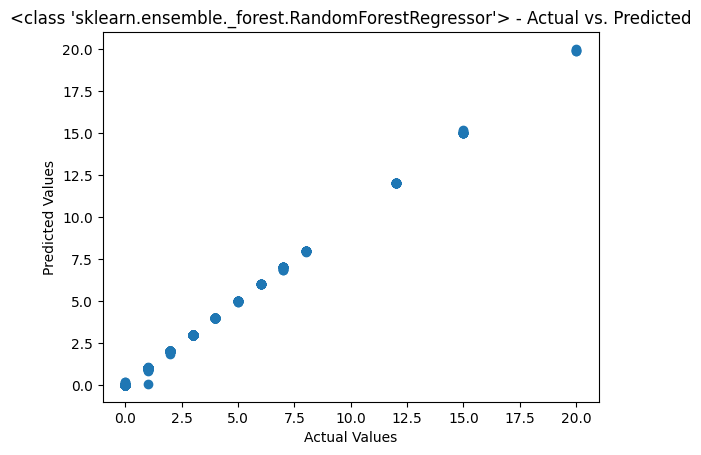

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'{RandomForestRegressor} - Actual vs. Predicted')
plt.show()

The scatter plot depicts that the actual values alligned correctly with the predicted values.

#**XGB Regressor without Hyper parameter Tuning**

In [24]:
xgb_before_tuning = XGBRegressor(random_state=42)
xgb_before_tuning.fit(x_train, y_train)
y_pred_before = xgb_before_tuning.predict(x_test)
mse_before_tuning_XGB = mean_squared_error(y_test, y_pred_before)

In [25]:
mse = mean_squared_error(y_test, y_pred_before)
mae = mean_absolute_error(y_test, y_pred_before)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_before)

In [29]:
print(f"{XGBRegressor} - MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2 Score: {rmse:.4f}")

<class 'xgboost.sklearn.XGBRegressor'> - MSE: 0.0005, MAE: 0.0019, RMSE: 0.0228, R2 Score: 0.0228


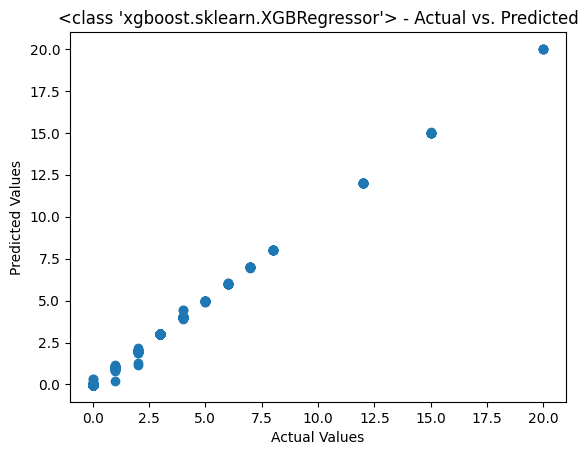

In [30]:
plt.scatter(y_test, y_pred_before)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'{XGBRegressor} - Actual vs. Predicted')
plt.show()

The scatter plot depicts that there is some misalignment between the actual and predicted values.

#**Extreme Machine Learning Model**

In [31]:
class ELMRegressor:
    def __init__(self, n_input, n_hidden, activation_function=np.tanh):
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.activation_function = activation_function
        self.weights_input_hidden = None
        self.bias_hidden = None
        self.weights_hidden_output = None

    def _initialize_weights(self):
        self.weights_input_hidden = np.random.rand(self.n_input, self.n_hidden)
        self.bias_hidden = np.random.rand(1, self.n_hidden)
        self.weights_hidden_output = np.random.rand(self.n_hidden, 1)

    def _activation(self, x):
        return self.activation_function(x)

    def train(self, X, y):
        self._initialize_weights()

        # Calculate hidden layer output
        hidden_output = self._activation(np.dot(X, self.weights_input_hidden) + self.bias_hidden)

        # Calculate output layer weights using the Moore-Penrose pseudoinverse
        self.weights_hidden_output = np.dot(np.linalg.pinv(hidden_output), y)

    def predict(self, X):
        hidden_output = self._activation(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        output = np.dot(hidden_output, self.weights_hidden_output)
        return output
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

In [32]:
elm = ELMRegressor(n_input = x_train.shape[1], n_hidden=50)
elm.train(x_train, y_train)

In [33]:
y_pred_train_ELM = elm.predict(x_train)
y_pred_test_ELM = elm.predict(x_test)

In [34]:
mse = mean_squared_error(y_test, y_pred_test_ELM)
mae = mean_absolute_error(y_test, y_pred_test_ELM)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test_ELM)

In [36]:
print(f"{ELMRegressor} - MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2 Score: {rmse:.4f}")

<class '__main__.ELMRegressor'> - MSE: 1.8147, MAE: 0.6146, RMSE: 1.3471, R2 Score: 1.3471


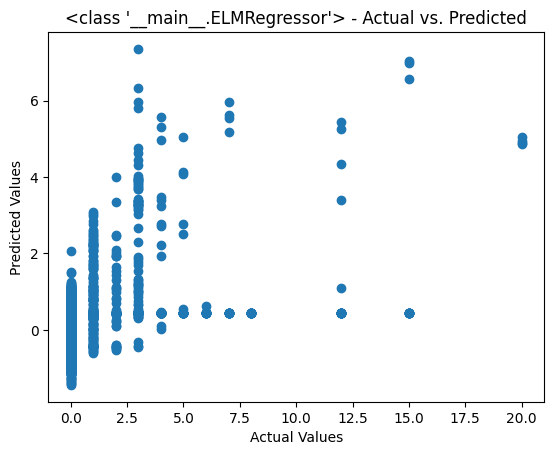

In [37]:
plt.scatter(y_test, y_pred_test_ELM)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'{ELMRegressor} - Actual vs. Predicted')
plt.show()

The scatter plot depicts that significant observations misaligned between the actual and predicted values.

#**A Basic Deep Learning Model with two layers**

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
# Build the model
model = Sequential([
    # Input layer (specify the input shape for the first layer)
    Dense(units=10, activation='relu', input_shape=(x_train.shape[1],)),

    # Hidden layer
    Dense(units=5, activation='relu'),

    # Output layer
    Dense(units=1, activation='linear')  # Assuming it's a regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Assuming it's a regression task

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                290       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 351 (1.37 KB)
Trainable params: 351 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on training and test data
y_pred_train = model.predict(x_train).flatten()
y_pred_test = model.predict(x_test).flatten()

mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

172/172 [==============================] - 0s 2ms/step


In [55]:
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2 Score: {rmse:.4f}")

MSE: 0.0070, MAE: 0.0248, RMSE: 0.0839, R2 Score: 0.0839


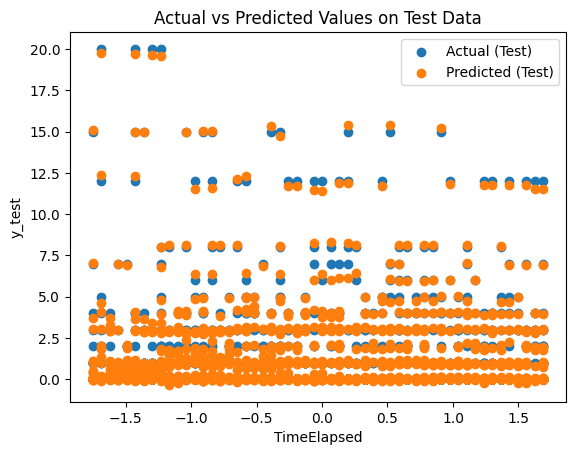

In [56]:
# Plot actual vs predicted values on test data
plt.scatter(x_test.iloc[:, 0], y_test, label='Actual (Test)')
plt.scatter(x_test.iloc[:, 0], y_pred_test, label='Predicted (Test)')
plt.xlabel(x_test.columns[0])
plt.ylabel('y_test')
plt.legend()
plt.title('Actual vs Predicted Values on Test Data')
plt.show()

#**An Ensemble model containing the top 3 models overall**

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [64]:
# Train XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

# Train Extreme Learning Machine (ELM) model
elm_model = ELMRegressor(n_input = x_train.shape[1], n_hidden=50)
elm_model.train(x_train, y_train)
y_pred_elm = elm_model.predict(x_test)

# Train basic deep learning model with two layers using TensorFlow and Keras
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)
y_pred_dl = model.predict(x_test).flatten()

# Ensure dimensions match by reshaping
y_pred_xgb = y_pred_xgb.reshape(-1)
y_pred_elm = y_pred_elm.reshape(-1)
y_pred_dl = y_pred_dl.flatten()

# Create ensemble predictions
ensemble_predictions = (y_pred_xgb + y_pred_elm + y_pred_dl) / 3.0

# Calculate ensemble mean squared error
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)

172/172 [==============================] - 0s 1ms/step


In [65]:
print("MSE on an Ensemble Model:", ensemble_mse)

MSE on an Ensemble Model: 0.24346072831973858
